# TASK 1 : Data Exploration and Preparation

Loading and exploring the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 different classes.

In [1]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Visualize 5 random images from the dataset with their corresponding labels using matplotlib.


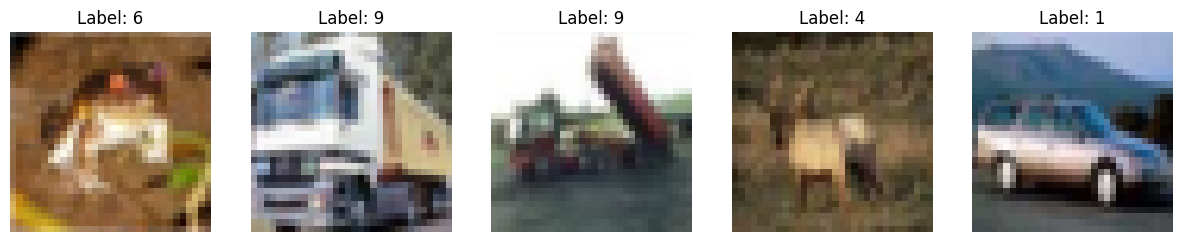

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].set_title(f'Label: {y_train[i][0]}')
    axes[i].axis('off')
plt.show()


Check the shape and distribution of labels.



In [3]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Unique labels:", len(set(y_train.flatten())))


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Unique labels: 10


Normalize the images to scale pixel values between 0 and 1:


In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0


Typically, CIFAR-10 comes pre-split into training (50,000) and testing (10,000) sets. However, to meet the assignment instructions of an 80% training and 20% testing split, you may concatenate the data first and then split

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Task 2: Build and Train a CNN Model

1. Creating a Convolutional Neural Network architecture for image classification.
2. Training and validating the model using CIFAR-10.
-----------------------------------------------------------
Step-by-step Explanation:

# Design CNN Architecture

1. Convolutional layers (Conv2D): These layers detect features such as edges, shapes, and textures from the images.
2. Activation Function (ReLU): Adds non-linearity to help the model learn complex patterns.
3. Pooling layers (MaxPooling): Reduce the spatial size of feature maps to decrease computational cost and reduce overfitting.
4. Dropout: Randomly deactivates neurons during training to reduce overfitting.
5. Flattening (Flatten): Converts multi-dimensional outputs into a single dimension before fully connected layers.
6. Fully Connected Layers (Dense): These layers learn from the extracted features and make predictions.
7. Softmax Activation: Outputs probability scores for each of the 10 classes.

------------------------------------------------------------------------
Compile the CNN Model

1. Choose appropriate loss function (sparse_categorical_crossentropy), optimizer (adam), and metrics (accuracy).
2. Train the CNN Model

3. Train the CNN model on your dataset for 10-20 epochs, observing training and validation accuracy/loss.
4. Plot Accuracy and Loss

5. Plot curves to visualize accuracy and loss to observe the training behavior.
6. Identify overfitting: If training accuracy is high but validation accuracy is significantly lower, it indicates overfitting.
7. Identify underfitting: If both training and validation accuracy are low, the model might be underfitting.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compiling Model And Training Model**



In [7]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    batch_size=64)


Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 74s 96ms/step - accuracy: 0.2556 - loss: 1.9770 - val_accuracy: 0.4996 - val_loss: 1.4072
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 71s 95ms/step - accuracy: 0.4711 - loss: 1.4656 - val_accuracy: 0.5606 - val_loss: 1.2345
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 75s 100ms/step - accuracy: 0.5407 - loss: 1.2944 - val_accuracy: 0.5949 - val_loss: 1.1443
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 99s 132ms/step - accuracy: 0.5692 - loss: 1.2137 - val_accuracy: 0.6264 - val_loss: 1.0515
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 128s 113ms/step - accuracy: 0.6035 - loss: 1.1340 - val_accuracy: 0.6636 - val_loss: 0.9754
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 137s 106ms/step - accuracy: 0.6209 - loss: 1.0824 - val_accuracy: 0.6742 - val_loss: 0.9274
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 71s 94ms/step - accuracy: 0.6322 - loss: 1.0464 - val_accuracy: 0.6794 - val_loss: 0.9068
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 72s 96ms/step - accuracy: 0.6458 - loss: 1.0

Analyze the plots to determine if the model shows signs of overfitting (training accuracy higher than validation) or underfitting (both low).

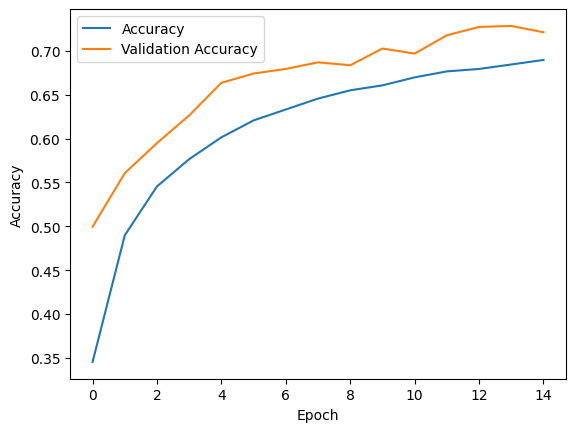

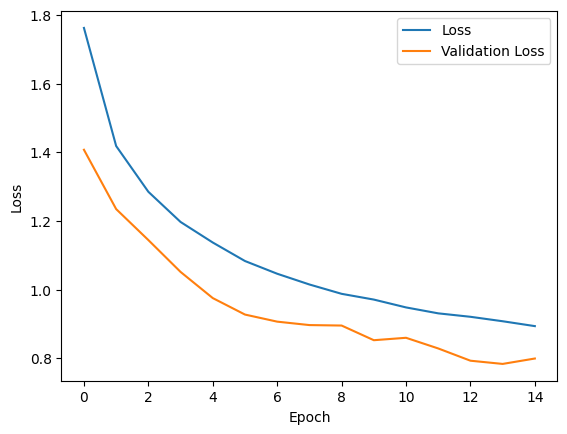

In [8]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Task 3: Evaluate the Model

Measuring the performance of your trained CNN on unseen data.

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')


375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.7245 - loss: 0.7923
Test Accuracy: 0.7211666703224182


Generate Confusion Matrix and Classification Report

375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step
              precision    recall  f1-score   support

           0       0.87      0.63      0.73      1181
           1       0.91      0.81      0.86      1188
           2       0.69      0.52      0.59      1232
           3       0.54      0.51      0.53      1274
           4       0.61      0.78      0.68      1179
           5       0.65      0.64      0.64      1230
           6       0.64      0.89      0.74      1123
           7       0.85      0.71      0.77      1217
           8       0.76      0.90      0.82      1189
           9       0.82      0.86      0.84      1187

    accuracy                           0.72     12000
   macro avg       0.73      0.72      0.72     12000
weighted avg       0.73      0.72      0.72     12000



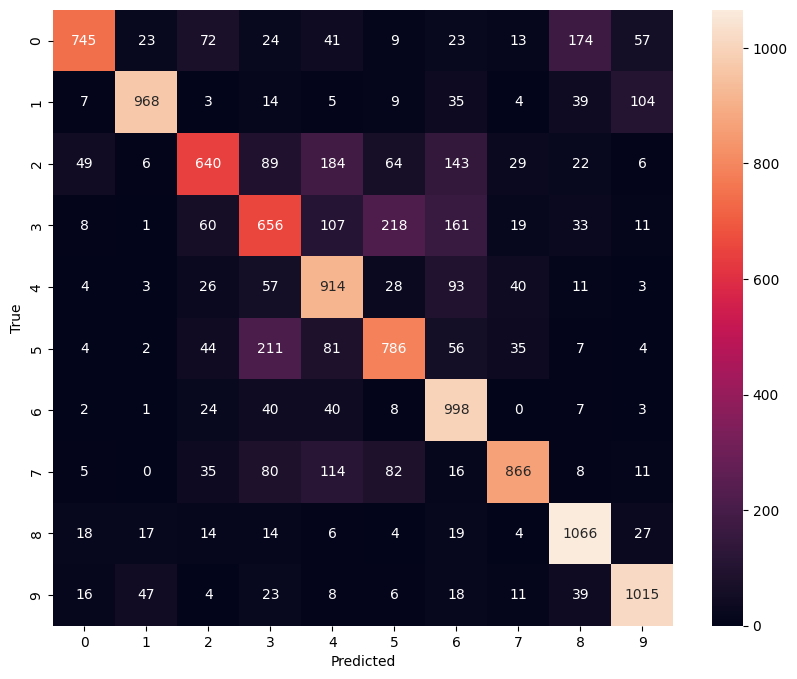

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Task 4: Experimentation with Model Improvements

Trying to improve your CNN’s performance by experimenting with different optimizers.
Replace the optimizer (e.g., from Adam to SGD or RMSProp), retrain the model, and compare performance.

In [11]:
# Example using RMSprop
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Retrain and evaluate
history_rmsprop = model.fit(x_train, y_train,
                            epochs=15,
                            validation_data=(x_test, y_test),
                            batch_size=64)

# Compare results in a table


Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 101ms/step - accuracy: 0.6882 - loss: 0.9169 - val_accuracy: 0.7363 - val_loss: 0.7707
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 74s 98ms/step - accuracy: 0.6949 - loss: 0.8902 - val_accuracy: 0.6649 - val_loss: 0.9815
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.6950 - loss: 0.8968 - val_accuracy: 0.7374 - val_loss: 0.7708
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 103ms/step - accuracy: 0.6981 - loss: 0.8860 - val_accuracy: 0.7435 - val_loss: 0.7598
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 104ms/step - accuracy: 0.6962 - loss: 0.8945 - val_accuracy: 0.7259 - val_loss: 0.8110
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 73s 98ms/step - accuracy: 0.7001 - loss: 0.8960 - val_accuracy: 0.7370 - val_loss: 0.7864
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.6910 - loss: 0.9153 - val_accuracy: 0.7508 - val_loss: 0.7590
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 73s 97ms/step - accuracy: 0.7013 - loss: 0.9027